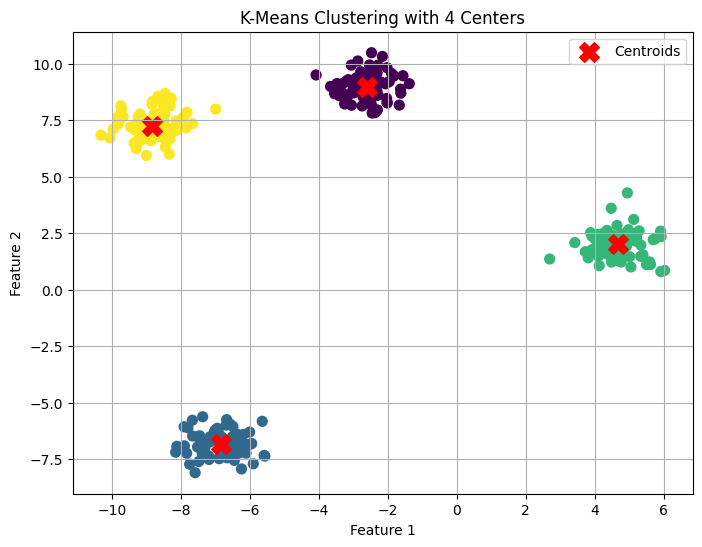

In [1]:
#21.Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with 4 Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
#22.Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X)

print("First 10 predicted cluster labels:")
print(labels[:10])


First 10 predicted cluster labels:
[1 1 1 1 1 1 1 1 1 1]


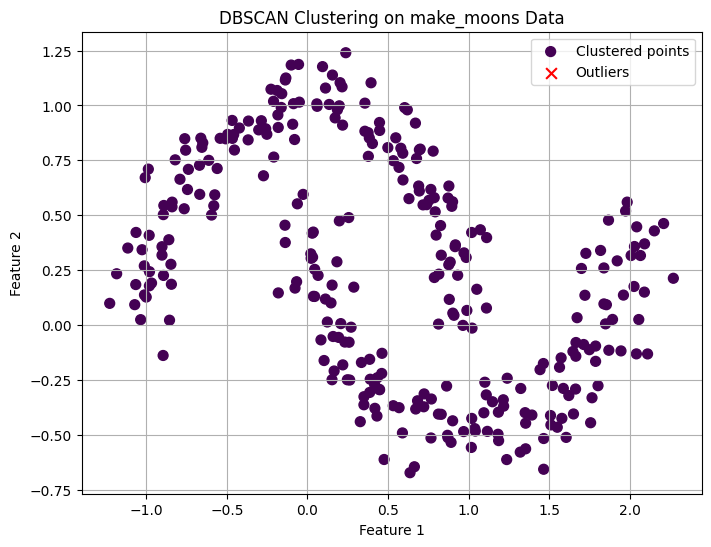

In [3]:
#23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np


X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)


dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)


core_samples_mask = labels != -1  
noise_mask = labels == -1         


plt.figure(figsize=(8, 6))
plt.scatter(X[core_samples_mask, 0], X[core_samples_mask, 1], 
            c=labels[core_samples_mask], cmap='viridis', s=50, label='Clustered points')
plt.scatter(X[noise_mask, 0], X[noise_mask, 1], 
            c='red', marker='x', s=60, label='Outliers')
plt.title('DBSCAN Clustering on make_moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
#24.Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np


wine = load_wine()
X = wine.data


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)


unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster sizes:")
for cluster_id, size in cluster_sizes.items():
    print(f"Cluster {cluster_id}: {size} samples")


Cluster sizes:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


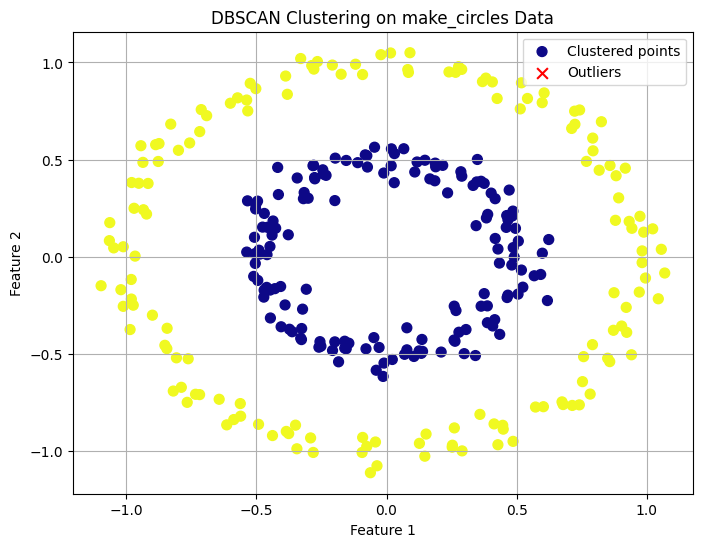

In [8]:
#25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np


X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)


dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)


core_points = labels != -1
noise_points = labels == -1


plt.figure(figsize=(8, 6))
plt.scatter(X[core_points, 0], X[core_points, 1], 
            c=labels[core_points], cmap='plasma', s=50, label='Clustered points')
plt.scatter(X[noise_points, 0], X[noise_points, 1], 
            c='red', marker='x', s=60, label='Outliers')
plt.title('DBSCAN Clustering on make_circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
#26.Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd


data = load_breast_cancer()
X = data.data
feature_names = data.feature_names


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)


centroids = kmeans.cluster_centers_


centroids_df = pd.DataFrame(centroids, columns=feature_names)
print("Cluster Centroids (scaled features):")
print(centroids_df)


Cluster Centroids (scaled features):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst fracta

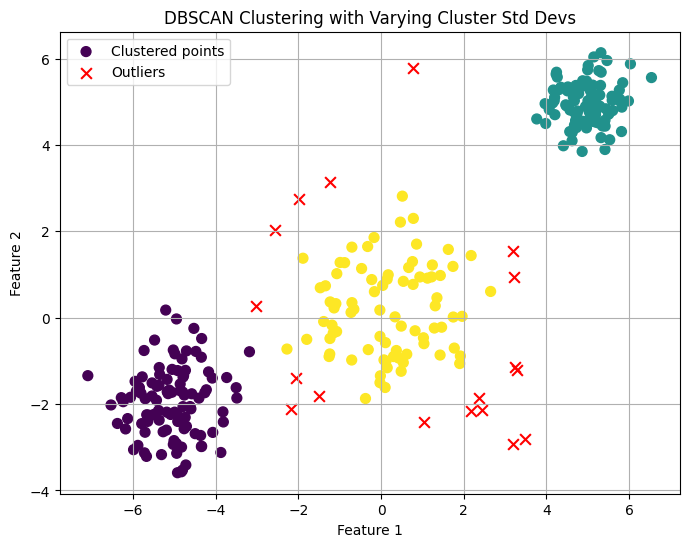

In [10]:
#27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

X, _ = make_blobs(n_samples=300,
                  centers=[(-5, -2), (0, 0), (5, 5)],
                  cluster_std=[0.8, 1.5, 0.5],
                  random_state=42)


dbscan = DBSCAN(eps=0.9, min_samples=5)
labels = dbscan.fit_predict(X)

core_mask = labels != -1
noise_mask = labels == -1

plt.figure(figsize=(8, 6))
plt.scatter(X[core_mask, 0], X[core_mask, 1], 
            c=labels[core_mask], cmap='viridis', s=50, label='Clustered points')
plt.scatter(X[noise_mask, 0], X[noise_mask, 1], 
            c='red', marker='x', s=60, label='Outliers')
plt.title('DBSCAN Clustering with Varying Cluster Std Devs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


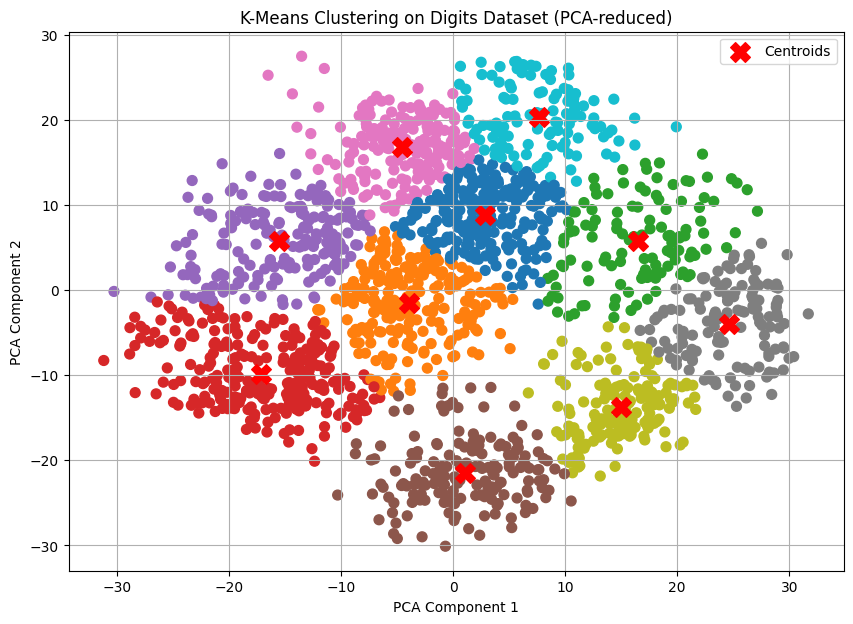

In [11]:
#28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target  

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering on Digits Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


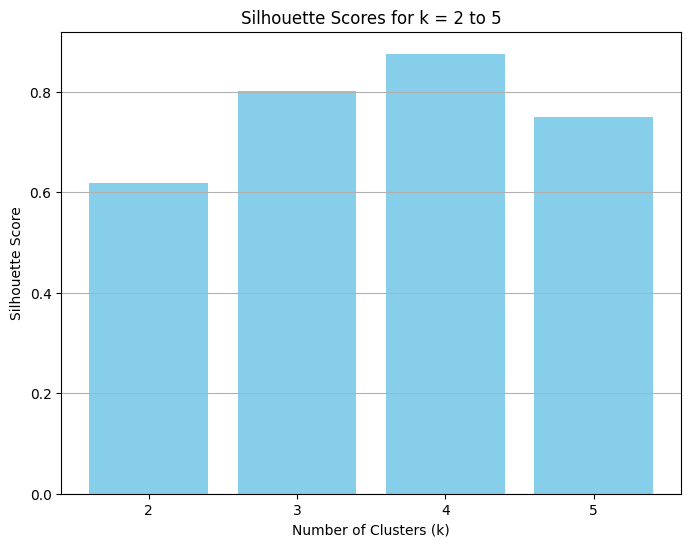

In [12]:
#29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k = 2 to 5')
plt.xticks(k_values)
plt.grid(axis='y')
plt.show()


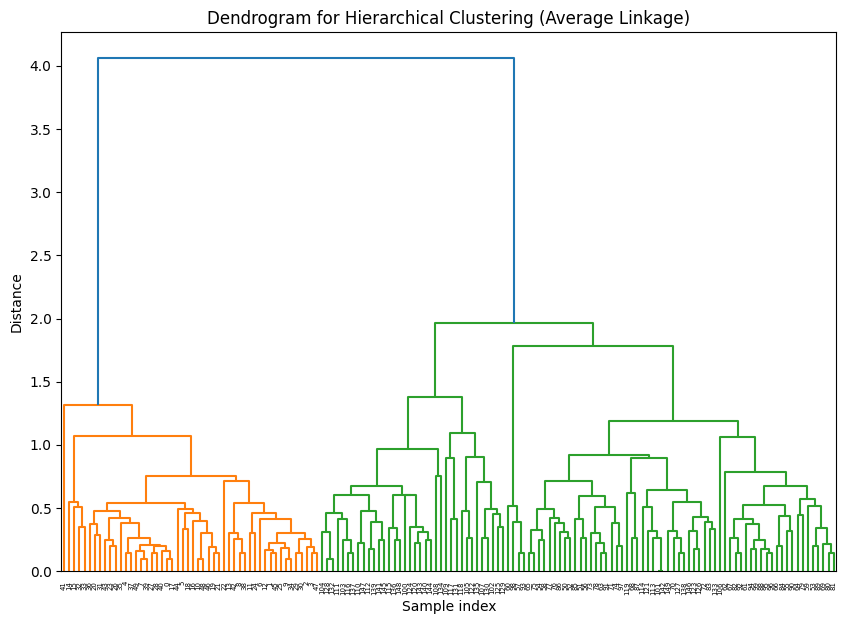

In [13]:
#30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

Z = linkage(X, method='average')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering (Average Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


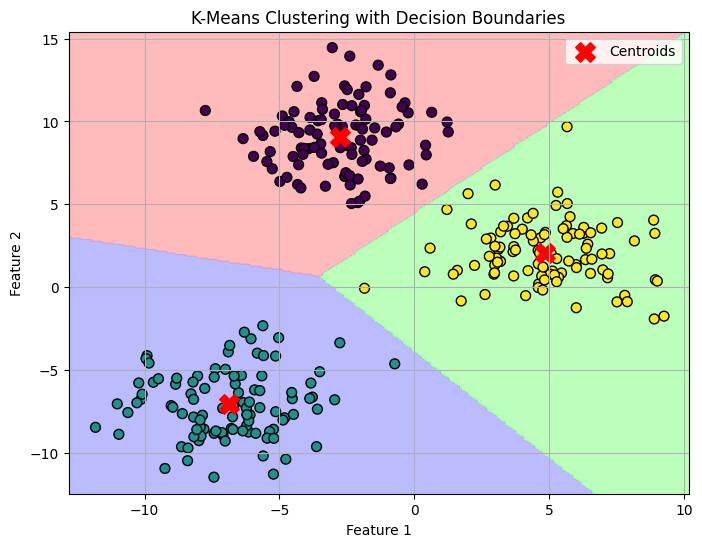

In [14]:
#31.Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap


X, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.0, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA']))

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k', s=50, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')


plt.title('K-Means Clustering with Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


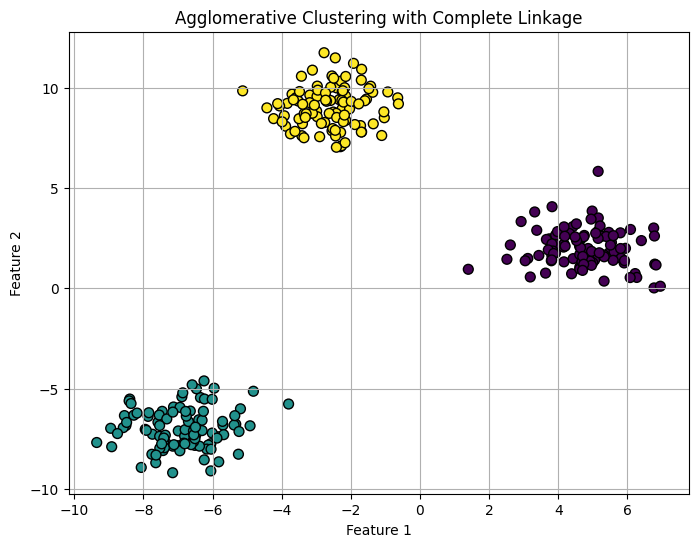

In [15]:
#33.Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

agglo = AgglomerativeClustering(n_clusters=3, linkage='complete')
y_agglo = agglo.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_agglo, cmap='viridis', edgecolors='k', s=50)
plt.title('Agglomerative Clustering with Complete Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


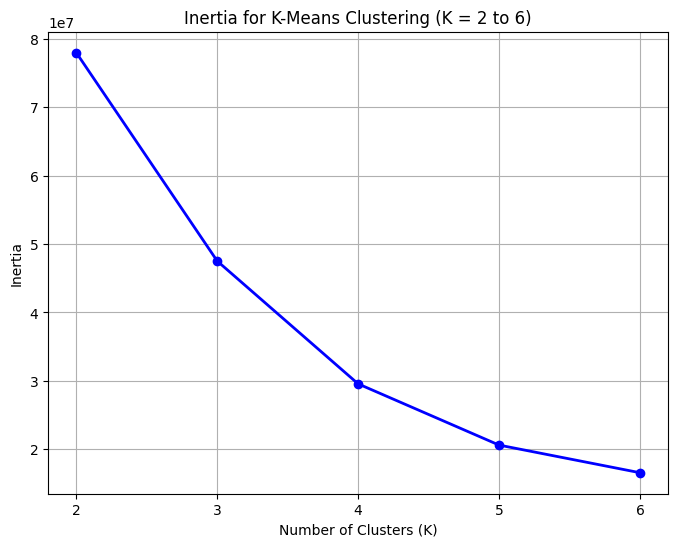

In [16]:
#34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data

inertia_values = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Inertia for K-Means Clustering (K = 2 to 6)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(k_values)
plt.show()


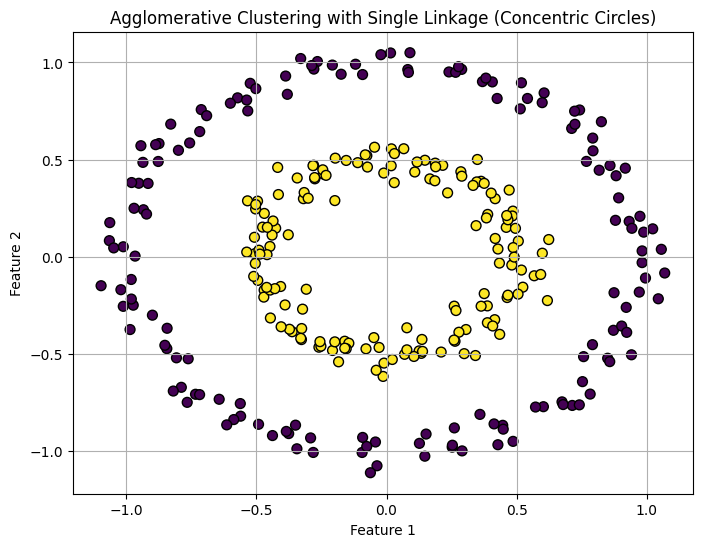

In [17]:
#35.Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)


agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
y_agglo = agglo.fit_predict(X)


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_agglo, cmap='viridis', edgecolors='k', s=50)
plt.title('Agglomerative Clustering with Single Linkage (Concentric Circles)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


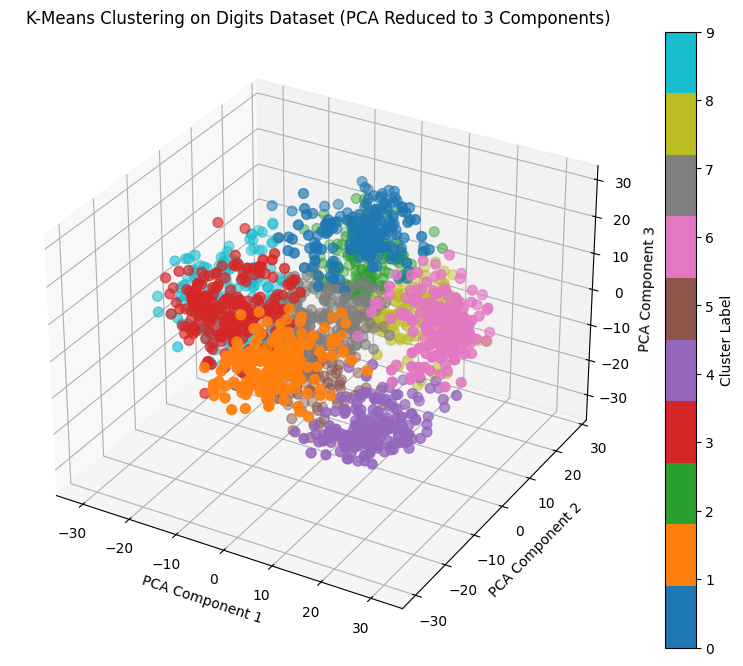

In [18]:
#40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10', s=50)

plt.colorbar(scatter, ax=ax, label='Cluster Label')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('K-Means Clustering on Digits Dataset (PCA Reduced to 3 Components)')
plt.show()


Silhouette Score: 0.678738720085253


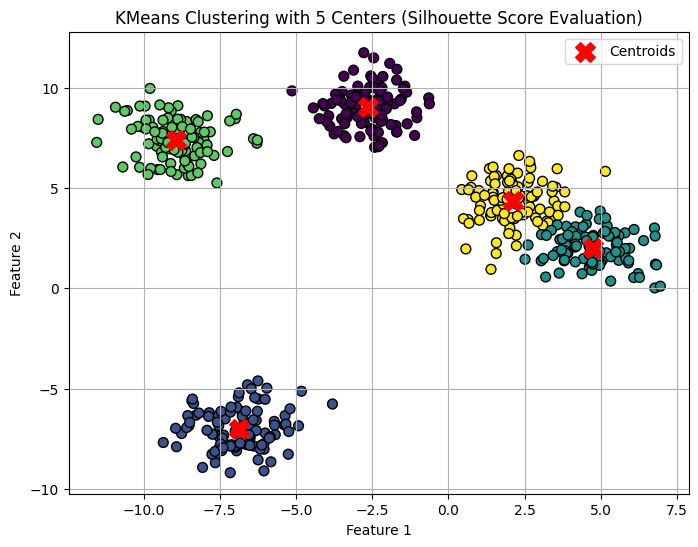

In [19]:
#41.Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

sil_score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {sil_score}')

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering with 5 Centers (Silhouette Score Evaluation)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


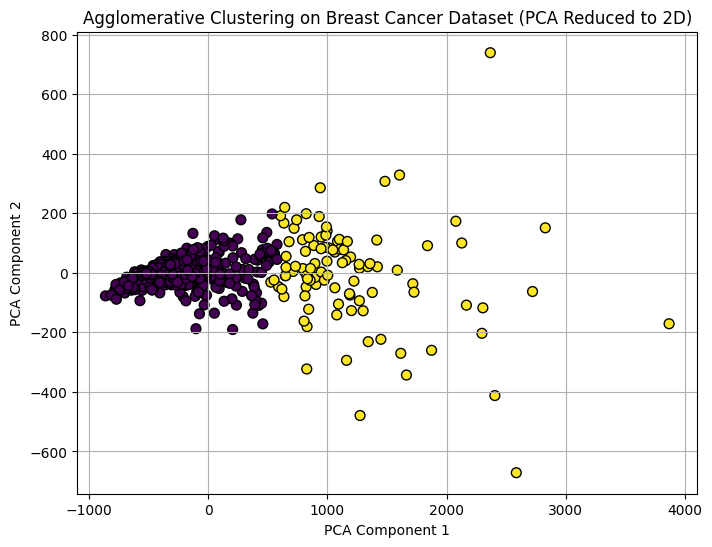

In [20]:
#42.Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

agglo = AgglomerativeClustering(n_clusters=2)
y_agglo = agglo.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_agglo, cmap='viridis', edgecolors='k', s=50)
plt.title('Agglomerative Clustering on Breast Cancer Dataset (PCA Reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


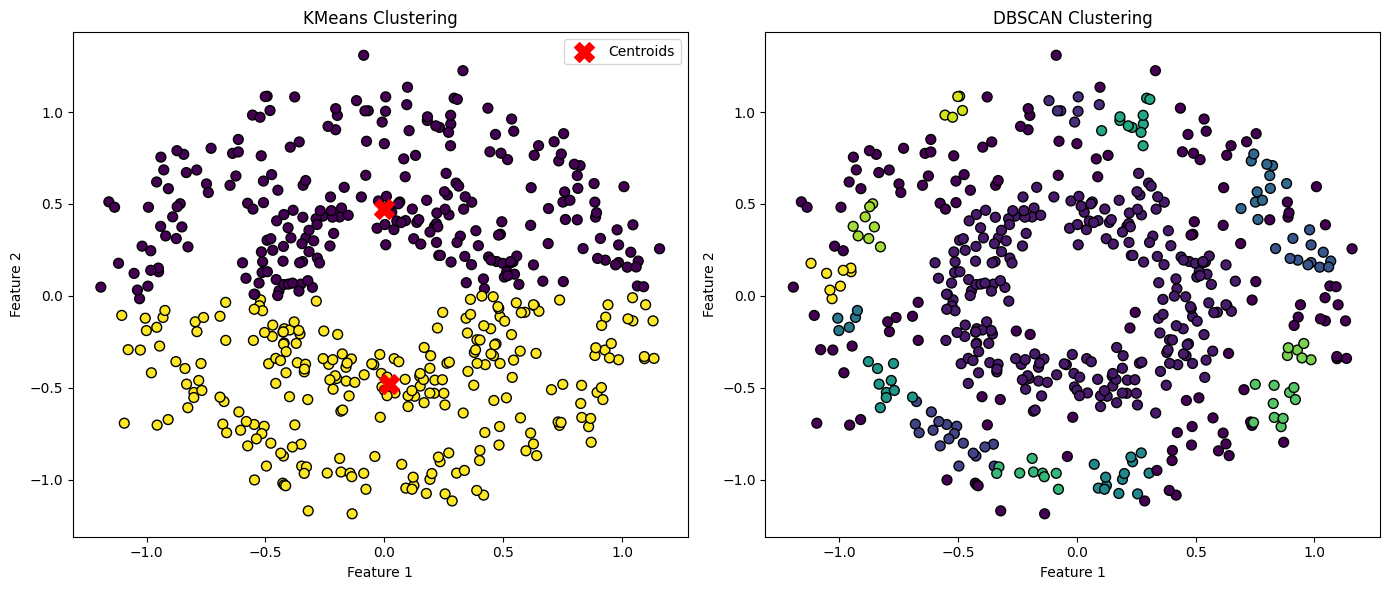

In [21]:
#43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=500, factor=0.5, noise=0.1, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.1, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))


axs[0].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k', s=50)
axs[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
axs[0].set_title('KMeans Clustering')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].legend()

axs[1].scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', edgecolors='k', s=50)
axs[1].set_title('DBSCAN Clustering')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


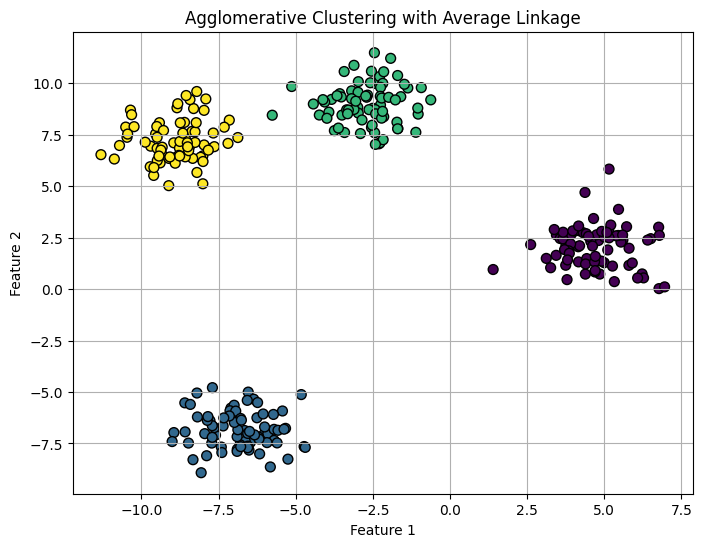

In [22]:
#45.Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
y_agglo = agglo.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_agglo, cmap='viridis', edgecolors='k', s=50)
plt.title('Agglomerative Clustering with Average Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


C:\Users\simar\AppData\Local\Temp\ipykernel_33876\446098712.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subset['Cluster'] = kmeans.fit_predict(X_subset)


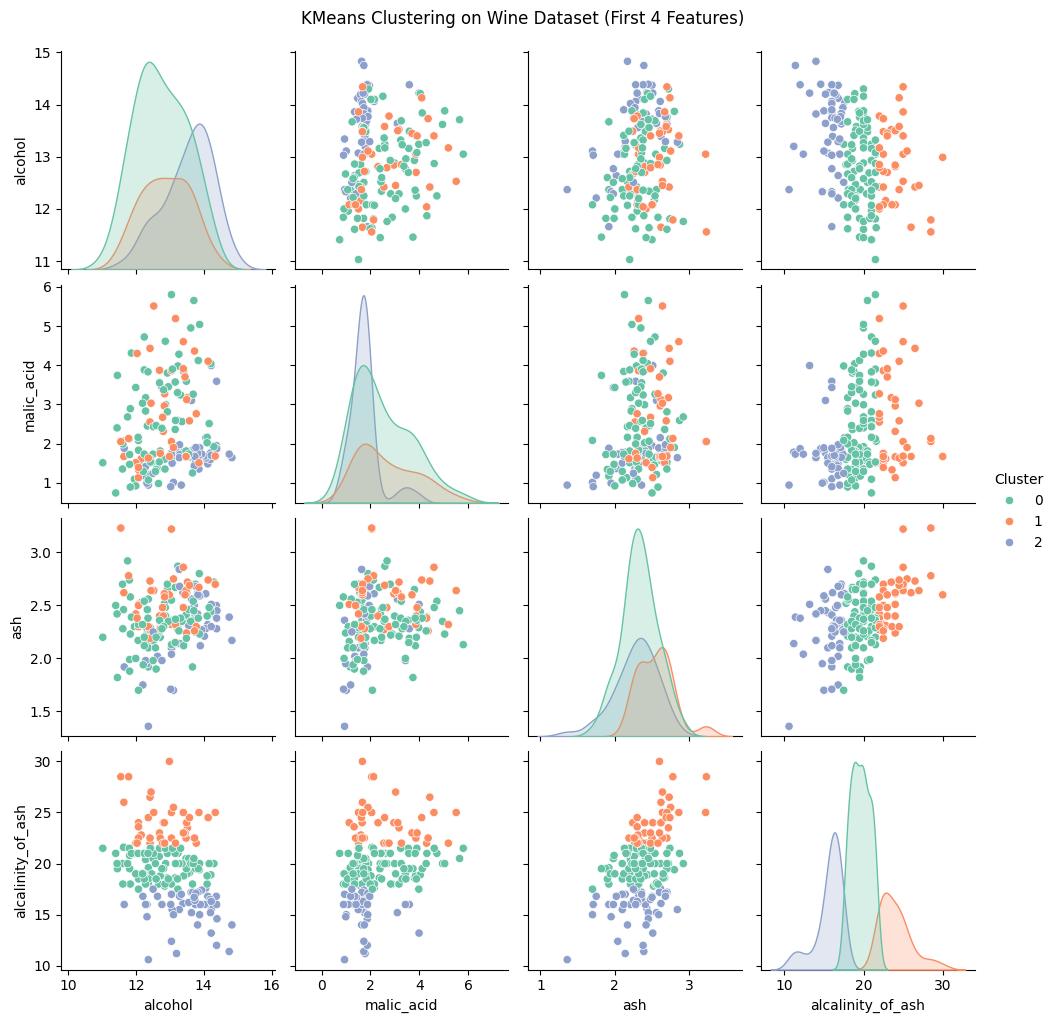

In [23]:
#46.Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

X_subset = X.iloc[:, :4]

kmeans = KMeans(n_clusters=3, random_state=42)
X_subset['Cluster'] = kmeans.fit_predict(X_subset)

sns.pairplot(X_subset, hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle('KMeans Clustering on Wine Dataset (First 4 Features)', y=1.02)
plt.show()


Estimated number of clusters: 4
Estimated number of noise points: 15
Noise: 15 points
Cluster 0: 124 points
Cluster 1: 121 points
Cluster 2: 120 points
Cluster 3: 120 points


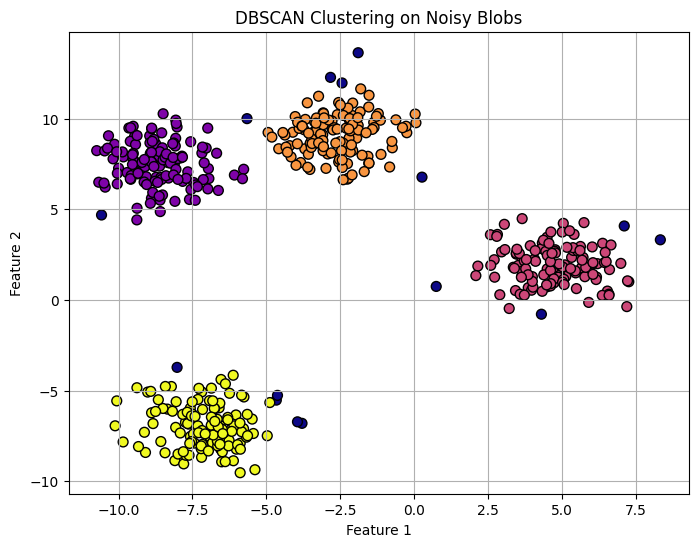

In [24]:
#47.Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)

dbscan = DBSCAN(eps=1.0, min_samples=5)
labels = dbscan.fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

unique_labels, counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    cluster_name = f"Cluster {label}" if label != -1 else "Noise"
    print(f'{cluster_name}: {count} points')

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', edgecolors='k', s=50)
plt.title('DBSCAN Clustering on Noisy Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


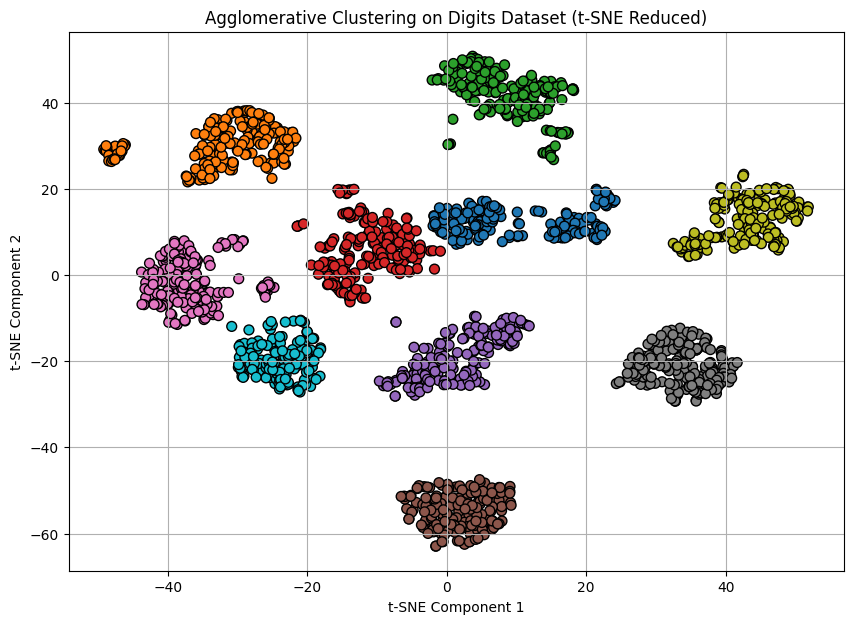

In [25]:
#48.Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


digits = load_digits()
X = digits.data

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

agglo = AgglomerativeClustering(n_clusters=10)
labels = agglo.fit_predict(X_tsne)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=50, edgecolor='k')
plt.title('Agglomerative Clustering on Digits Dataset (t-SNE Reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()
